In [1]:
!pip install shap

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   -- ------------------------------------- 30.7/456.1 kB ? eta -:--:--
   -- ------------------------------------- 30.7/456.1 kB ? eta -:--:--
   --- ----------------------------------- 41.0/456.1 kB 281.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.1 kB 281.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.1 kB 281.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.1 kB 281.8 kB/s eta 0:00:02
   --------- ---------------------------- 112.6/456.1 kB 328.2 kB/s eta 0:00:02
   ---------- --------------------------- 122.9/456.1 kB 327.4 kB/s eta 0:00:02
   ---------- --------------------------- 122.9/456.1 kB 327.4 kB/s eta 0:00:02
   ---------- --------------------------- 122.9/456.1 kB 327.4 kB/s eta 0:00:02
   ---------- --------------------------- 122.9/456.1 kB 327.4 kB/s eta 0:00:02
   ---------- --------------------------- 122.9/456.1 kB 327.4 kB


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ------------------------- -------------- 17.9/28.1 MB 88.5 kB/s eta 0:01:56
   ------------------------- -------------- 17.9/28.1 MB 88.5 kB/s eta 0:01:56
   ------------------------- -------------- 17.9/28.1 MB 88.5 kB/s eta 0:01:56
   ------------------------- -------------- 17.9/28.1 MB 88.5 kB/s eta 0:01:56
   ------------------------- -------------- 17.9/28.1 MB 88.5 kB/s eta 0:01:56
   ------------------------- -------------- 17.9/28.1 MB 88.5 kB/s eta 0:01:56
   ------------------------- -------------- 17.9/28.1 MB 88.5 kB/s eta 0:01:56
   ------------------------- -------------- 17.9/28.1 MB 88.5 kB/s eta 0:01:56
   ------------------------- -------------- 17.9/28.1 MB 84.8 kB/s eta 0:02:01
   ------------------------- -------------- 17.9/28.1 MB 84.8 kB/s eta 0:02:01
   ------------------------- -------------- 17.9/28.1 MB 84.8 kB/s eta 0:02:01
   ------------------------- -------------- 17.9/28.1 MB 84.8 kB/s eta 0:02:01
   ------------------------- -------------- 17.9/28

c:\Users\74860\kanenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


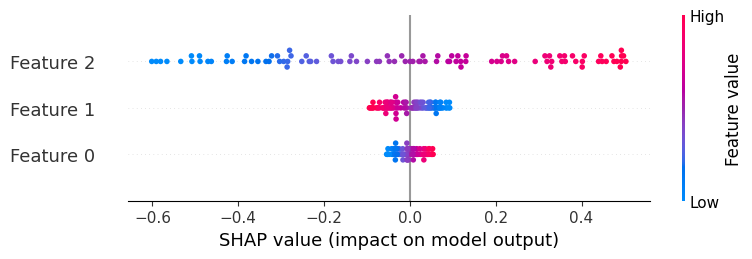

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import shap
import numpy as np

# 生成一些示例数据
X_np = np.random.rand(100, 3)  # 100个样本，3个特征
y_np = X_np @ np.array([1.5, -2.0, 3.0]) + np.random.normal(0, 0.1, 100)  # 线性关系 + 噪声

# 转换为Torch张量
X_tensor = torch.tensor(X_np, dtype=torch.float32)
y_tensor = torch.tensor(y_np, dtype=torch.float32).view(-1, 1)

# 定义模型
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc = nn.Linear(3, 1)  # 3个输入特征，1个输出

    def forward(self, x):
        return self.fc(x)

# 初始化模型、损失函数和优化器
model = MyModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_tensor)  # 使用Torch张量作为输入
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

# 定义预测函数
def model_predict(X):
    with torch.no_grad():  # 不计算梯度
        return model(torch.tensor(X, dtype=torch.float32)).numpy()

# 使用SHAP计算值
explainer = shap.Explainer(model_predict, X_np)  # 使用预测函数
shap_values = explainer(X_np)

# 绘制SHAP图
shap.summary_plot(shap_values, X_np)